In [1]:
import os, sys, gc
import time
import glob
import pickle
import copy
import json
import random
from collections import OrderedDict, namedtuple
import multiprocessing
import threading
import traceback
import gc

from typing import Tuple, List
from collections import defaultdict

import h5py
from tqdm import tqdm, tqdm_notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
from PIL import Image


from IPython.display import display, clear_output

import faiss

from modules.eval_functions import *
from modules.eval_metrics import evaluate
from modules.AugsDS_v13 import *

 - Found: 861 screenshots.  SCREENSHOT_DIR=./FB_page_qry


In [2]:
VERSION = 9

RUN_VALIDATIONS = False

In [3]:
public_ground_truth_path = './all_datasets/dataset/public_ground_truth.csv'

In [4]:
public_gt = pd.read_csv( public_ground_truth_path )

# Description Track

## Loading submissions

In [5]:
all_embed_ref_d_v = []
all_embed_qry_d_v = []
all_submission_path_v = []
all_mAP = []
all_desc = []

### - Test 5

In [6]:
if True:
    submission_path = './checkpoints/sjy_test5/FacebookModel_Eepoch=51_TLtrn_loss_epoch=0.8669_TAtrn_acc_epoch=0.9914_VLval_loss_epoch=0.4390_VAval_acc_epoch=0.9930_512x512_REF.h5'
    embed_qry_d, embed_ref_d = read_submission(submission_path)

    all_embed_qry_d_v.append(embed_qry_d)
    all_embed_ref_d_v.append(embed_ref_d)
    all_submission_path_v.append(submission_path)

    all_mAP.append(0.6362326916550998)
    all_desc.append( [s for s in submission_path.split('/') if 'test' in s][0] + '/epoch=' + [s for s in submission_path.split('_') if 'epoch' in s][0].split('=')[1]  )

    if RUN_VALIDATIONS:
        eval_d = evaluate(
            submission_path=submission_path,
            gt_path=public_ground_truth_path,
            is_matching=False,
        )

```
Running evaluation on: "./checkpoints/sjy_test5/FacebookModel_Eepoch=51_TLtrn_loss_epoch=0.8669_TAtrn_acc_epoch=0.9914_VLval_loss_epoch=0.4390_VAval_acc_epoch=0.9930_512x512_REF.h5"
{
  "average_precision": 0.6362326916550998,
  "recall_p90": 0.5257463434181526
}
```

### - Test 19

In [7]:
if True:
    submission_path = './checkpoints/smp_test19/FacebookModel_Eepoch=67_TLtrn_loss_epoch=0.9913_TAtrn_acc_epoch=0.0000_VLval_loss_epoch=0.4815_VAval_acc_epoch=0.9893_224x224_REF.h5'
    embed_qry_d, embed_ref_d = read_submission(submission_path)

    all_embed_qry_d_v.append(embed_qry_d)
    all_embed_ref_d_v.append(embed_ref_d)
    all_submission_path_v.append(submission_path)

    all_mAP.append(0.6378110962890179)
    all_desc.append( [s for s in submission_path.split('/') if 'test' in s][0] + '/epoch=' + [s for s in submission_path.split('_') if 'epoch' in s][0].split('=')[1]  )

    if RUN_VALIDATIONS:
        eval_d = evaluate(
            submission_path=submission_path,
            gt_path=public_ground_truth_path,
            is_matching=False,
        )

```
 Running evaluation on: "./checkpoints/smp_test19/FacebookModel_Eepoch=67_TLtrn_loss_epoch=0.9913_TAtrn_acc_epoch=0.0000_VLval_loss_epoch=0.4815_VAval_acc_epoch=0.9893_224x224_REF.h5"
{
  "average_precision": 0.6378110962890179,
  "recall_p90": 0.5223402123822881
}
```

### - Test 22

In [8]:
if False:
    submission_path = './checkpoints/smp_test22/FacebookModel_Eepoch=15_TLtrn_loss_epoch=2.1522_TAtrn_acc_epoch=0.0000_VLval_loss_epoch=nan_VAval_acc_epoch=0.9752_160x160_REF.h5'
    embed_qry_d, embed_ref_d = read_submission(submission_path)

    all_embed_qry_d_v.append(embed_qry_d)
    all_embed_ref_d_v.append(embed_ref_d)
    all_submission_path_v.append(submission_path)

    all_mAP.append(0.6306082181957473)
    all_desc.append( [s for s in submission_path.split('/') if 'test' in s][0] + '/epoch=' + [s for s in submission_path.split('_') if 'epoch' in s][0].split('=')[1]  )

    if RUN_VALIDATIONS:
        eval_d = evaluate(
            submission_path=submission_path,
            gt_path=public_ground_truth_path,
            is_matching=False,
        )

```
 Running evaluation on: "./checkpoints/smp_test22/FacebookModel_Eepoch=15_TLtrn_loss_epoch=2.1522_TAtrn_acc_epoch=0.0000_VLval_loss_epoch=nan_VAval_acc_epoch=0.9752_160x160_REF.h5"
{
  "average_precision": 0.6306082181957473,
  "recall_p90": 0.5283510318573432
}
```

### - Test 24

In [9]:
if True:
    submission_path = './checkpoints/smp_test24/FacebookModel_epoch=79_trn_loss_epoch=0.6660_trn_acc_epoch=0.0000_val_loss_epoch=0.3122_val_acc_epoch=0.9937_160x160_REF.h5'
    embed_qry_d, embed_ref_d = read_submission(submission_path)

    all_embed_qry_d_v.append(embed_qry_d)
    all_embed_ref_d_v.append(embed_ref_d)
    all_submission_path_v.append(submission_path)

    all_mAP.append(0.6523854918089071)
    all_desc.append( [s for s in submission_path.split('/') if 'test' in s][0] + '/epoch=' + [s for s in submission_path.split('_') if 'epoch' in s][0].split('=')[1]  )

    if RUN_VALIDATIONS:
        eval_d = evaluate(
            submission_path=submission_path,
            gt_path=public_ground_truth_path,
            is_matching=False,
        )

```
 Running evaluation on: "./checkpoints/smp_test24/FacebookModel_epoch=79_trn_loss_epoch=0.6660_trn_acc_epoch=0.0000_val_loss_epoch=0.3122_val_acc_epoch=0.9937_160x160_REF.h5"
{
  "average_precision": 0.6523854918089071,
  "recall_p90": 0.5371669004207573
}
```

### - Test 25

In [10]:
if True:
    submission_path = './checkpoints/smp_test25/FacebookModel_epoch=16_trn_loss_epoch=0.9023_trn_acc_epoch=0.0000_val_loss_epoch=0.4303_val_acc_epoch=0.9911_160x160_REF.h5'
    embed_qry_d, embed_ref_d = read_submission(submission_path)

    all_embed_qry_d_v.append(embed_qry_d)
    all_embed_ref_d_v.append(embed_ref_d)
    all_submission_path_v.append(submission_path)

    all_mAP.append(0.6642482796817628)
    all_desc.append( [s for s in submission_path.split('/') if 'test' in s][0] + '/epoch=' + [s for s in submission_path.split('_') if 'epoch' in s][0].split('=')[1]  )

    if RUN_VALIDATIONS:
        eval_d = evaluate(
            submission_path=submission_path,
            gt_path=public_ground_truth_path,
            is_matching=False,
        )

```
 Running evaluation on: "./checkpoints/smp_test25/FacebookModel_epoch=16_trn_loss_epoch=0.9023_trn_acc_epoch=0.0000_val_loss_epoch=0.4303_val_acc_epoch=0.9911_160x160_REF.h5"
{
  "average_precision": 0.6642482796817628,
  "recall_p90": 0.5547986375475856
}

```

In [11]:
if True:
    submission_path = './checkpoints/smp_test25/FacebookModel_epoch=14_trn_loss_epoch=0.8997_trn_acc_epoch=0.0000_val_loss_epoch=0.4437_val_acc_epoch=0.9912_160x160_REF.h5'
    embed_qry_d, embed_ref_d = read_submission(submission_path)

    all_embed_qry_d_v.append(embed_qry_d)
    all_embed_ref_d_v.append(embed_ref_d)
    all_submission_path_v.append(submission_path)

    all_mAP.append(0.6640664715134845)
    all_desc.append( [s for s in submission_path.split('/') if 'test' in s][0] + '/epoch=' + [s for s in submission_path.split('_') if 'epoch' in s][0].split('=')[1]  )

    if RUN_VALIDATIONS:
        eval_d = evaluate(
            submission_path=submission_path,
            gt_path=public_ground_truth_path,
            is_matching=False,
        )

```
 Running evaluation on: "./checkpoints/smp_test25/FacebookModel_epoch=14_trn_loss_epoch=0.8997_trn_acc_epoch=0.0000_val_loss_epoch=0.4437_val_acc_epoch=0.9912_160x160_REF.h5"
{
  "average_precision": 0.6640664715134845,
  "recall_p90": 0.545782408335003
}

```

In [12]:
if False:
    submission_path = './checkpoints/smp_test25/FacebookModel_epoch=42_trn_loss_epoch=0.9105_trn_acc_epoch=0.0000_val_loss_epoch=0.4133_val_acc_epoch=0.9912_160x160_REF.h5'
    embed_qry_d, embed_ref_d = read_submission(submission_path)

    all_embed_qry_d_v.append(embed_qry_d)
    all_embed_ref_d_v.append(embed_ref_d)
    all_submission_path_v.append(submission_path)

    all_mAP.append(0.6391913083007844)
    all_desc.append( [s for s in submission_path.split('/') if 'test' in s][0] + '/epoch=' + [s for s in submission_path.split('_') if 'epoch' in s][0].split('=')[1]  )

    if RUN_VALIDATIONS:
        eval_d = evaluate(
            submission_path=submission_path,
            gt_path=public_ground_truth_path,
            is_matching=False,
        )

```
 Running evaluation on: "./checkpoints/smp_test25/FacebookModel_epoch=42_trn_loss_epoch=0.9105_trn_acc_epoch=0.0000_val_loss_epoch=0.4133_val_acc_epoch=0.9912_160x160_REF.h5"
{
  "average_precision": 0.6391913083007844,
  "recall_p90": 0.5043077539571228
}
```

### - Test 26

In [13]:
if True:
    submission_path = "./checkpoints/smp_test26/1.5M/FacebookModel_epoch=17_trn_loss_epoch=0.9250_trn_acc_epoch=0.0000_val_loss_epoch=0.4375_val_acc_epoch=0.9919_LIGHT_160x160_REF.h5"
    embed_qry_d, embed_ref_d = read_submission(submission_path)

    all_embed_qry_d_v.append(embed_qry_d)
    all_embed_ref_d_v.append(embed_ref_d)
    all_submission_path_v.append(submission_path)

    all_mAP.append(0.6607161760040644)
    all_desc.append( [s for s in submission_path.split('/') if 'test' in s][0] + '/epoch=' + [s for s in submission_path.split('_') if 'epoch' in s][0].split('=')[1]  )

    if RUN_VALIDATIONS:
        eval_d = evaluate(
            submission_path=submission_path,
            gt_path=public_ground_truth_path,
            is_matching=False,
        )

```
 Running evaluation on: "./checkpoints/smp_test26/1.5M/FacebookModel_epoch=17_trn_loss_epoch=0.9250_trn_acc_epoch=0.0000_val_loss_epoch=0.4375_val_acc_epoch=0.9919_LIGHT_160x160_REF.h5"
{
  "average_precision": 0.6607161760040644,
  "recall_p90": 0.5487878180725305
}
```

In [14]:
if False:
    submission_path = "./checkpoints/smp_test26/1.5M/FacebookModel_epoch=23_trn_loss_epoch=0.8591_trn_acc_epoch=0.0000_val_loss_epoch=0.4395_val_acc_epoch=0.9918_LIGHT_160x160_REF.h5"
    embed_qry_d, embed_ref_d = read_submission(submission_path)

    all_embed_qry_d_v.append(embed_qry_d)
    all_embed_ref_d_v.append(embed_ref_d)
    all_submission_path_v.append(submission_path)

    all_mAP.append(0.6468767301048789)
    all_desc.append( [s for s in submission_path.split('/') if 'test' in s][0] + '/epoch=' + [s for s in submission_path.split('_') if 'epoch' in s][0].split('=')[1]  )

    if RUN_VALIDATIONS:
        eval_d = evaluate(
            submission_path=submission_path,
            gt_path=public_ground_truth_path,
            is_matching=False,
        )

```
 Running evaluation on: "./checkpoints/smp_test26/1.5M/FacebookModel_epoch=23_trn_loss_epoch=0.8591_trn_acc_epoch=0.0000_val_loss_epoch=0.4395_val_acc_epoch=0.9918_LIGHT_160x160_REF.h5"
{
  "average_precision": 0.6468767301048789,
  "recall_p90": 0.5369665397715888
}

```

In [15]:
if False:
    submission_path = "./checkpoints/smp_test26/1.5M/FacebookModel_epoch=13_trn_loss_epoch=0.9797_trn_acc_epoch=0.0000_val_loss_epoch=0.4767_val_acc_epoch=0.9910_LIGHT_160x160_REF.h5"
    embed_qry_d, embed_ref_d = read_submission(submission_path)

    all_embed_qry_d_v.append(embed_qry_d)
    all_embed_ref_d_v.append(embed_ref_d)
    all_submission_path_v.append(submission_path)

    all_mAP.append(0.6564158976051848)
    all_desc.append( [s for s in submission_path.split('/') if 'test' in s][0] + '/epoch=' + [s for s in submission_path.split('_') if 'epoch' in s][0].split('=')[1]  )

    if RUN_VALIDATIONS:
        eval_d = evaluate(
            submission_path=submission_path,
            gt_path=public_ground_truth_path,
            is_matching=False,
        )

```
 Running evaluation on: "./checkpoints/smp_test26/1.5M/FacebookModel_epoch=13_trn_loss_epoch=0.9797_trn_acc_epoch=0.0000_val_loss_epoch=0.4767_val_acc_epoch=0.9910_LIGHT_160x160_REF.h5"
{
  "average_precision": 0.6564158976051848,
  "recall_p90": 0.5435784411941494
}
```

In [16]:
if False:
    submission_path = "./checkpoints/smp_test26/FacebookModel_epoch=46_trn_loss_epoch=0.8907_trn_acc_epoch=0.0000_val_loss_epoch=0.4081_val_acc_epoch=0.9923_160x160_REF.h5"
    embed_qry_d, embed_ref_d = read_submission(submission_path)

    all_embed_qry_d_v.append(embed_qry_d)
    all_embed_ref_d_v.append(embed_ref_d)
    all_submission_path_v.append(submission_path)

    all_mAP.append(0.6220850322176763)
    all_desc.append( [s for s in submission_path.split('/') if 'test' in s][0] + '/epoch=' + [s for s in submission_path.split('_') if 'epoch' in s][0].split('=')[1]  )

    if RUN_VALIDATIONS:
        eval_d = evaluate(
            submission_path=submission_path,
            gt_path=public_ground_truth_path,
            is_matching=False,
        )

```
 Running evaluation on: "./checkpoints/smp_test26/FacebookModel_epoch=46_trn_loss_epoch=0.8907_trn_acc_epoch=0.0000_val_loss_epoch=0.4081_val_acc_epoch=0.9923_160x160_REF.h5"
{
  "average_precision": 0.6220850322176763,
  "recall_p90": 0.46563814866760167
}
```

In [17]:
if False:
    submission_path = './checkpoints/smp_test26/FacebookModel_epoch=27_trn_loss_epoch=0.7062_trn_acc_epoch=0.0000_val_loss_epoch=0.3296_val_acc_epoch=0.9935_160x160_REF.h5'
    embed_qry_d, embed_ref_d = read_submission(submission_path)

    all_embed_qry_d_v.append(embed_qry_d)
    all_embed_ref_d_v.append(embed_ref_d)
    all_submission_path_v.append(submission_path)

    all_mAP.append(0.6068577970098343)
    all_desc.append( [s for s in submission_path.split('/') if 'test' in s][0] + '/epoch=' + [s for s in submission_path.split('_') if 'epoch' in s][0].split('=')[1]  )

    if RUN_VALIDATIONS:
        eval_d = evaluate(
            submission_path=submission_path,
            gt_path=public_ground_truth_path,
            is_matching=False,
        )

```
 Running evaluation on: "./checkpoints/smp_test26/FacebookModel_epoch=27_trn_loss_epoch=0.7062_trn_acc_epoch=0.0000_val_loss_epoch=0.3296_val_acc_epoch=0.9935_160x160_REF.h5"
{
  "average_precision": 0.6068577970098343,
  "recall_p90": 0.44419955920657184
}

```

### - Test 9

In [18]:
if True:
    submission_path = './checkpoints/sjy_test9/epoch=9-step=42649_LIGHT_160x160_REF.h5'
    embed_qry_d, embed_ref_d = read_submission(submission_path)

    all_embed_qry_d_v.append(embed_qry_d)
    all_embed_ref_d_v.append(embed_ref_d)
    all_submission_path_v.append(submission_path)

    all_mAP.append(0.6516177146642039)
    all_desc.append( [s for s in submission_path.split('/') if 'test' in s][0] + '/epoch=' + [s for s in submission_path.split('_') if 'epoch' in s][0].split('=')[1]  )

    if RUN_VALIDATIONS:
        eval_d = evaluate(
            submission_path=submission_path,
            gt_path=public_ground_truth_path,
            is_matching=False,
        )

```
 Running evaluation on: "./checkpoints/sjy_test9/epoch=9-step=42649_LIGHT_160x160_REF.h5"
{
  "average_precision": 0.6516177146642039,
  "recall_p90": 0.5551993588459226
}

```

In [19]:
if False:
    submission_path = './checkpoints/sjy_test9/epoch=24-step=106549_LIGHT_160x160_REF.h5'
    embed_qry_d, embed_ref_d = read_submission(submission_path)

    all_embed_qry_d_v.append(embed_qry_d)
    all_embed_ref_d_v.append(embed_ref_d)
    all_submission_path_v.append(submission_path)

    all_mAP.append(0.6274077127084968)
    all_desc.append( [s for s in submission_path.split('/') if 'test' in s][0] + '/epoch=' + [s for s in submission_path.split('_') if 'epoch' in s][0].split('=')[1]  )

    if RUN_VALIDATIONS:
        eval_d = evaluate(
            submission_path=submission_path,
            gt_path=public_ground_truth_path,
            is_matching=False,
        )

```
 Running evaluation on: "./checkpoints/sjy_test9/epoch=24-step=106549_LIGHT_160x160_REF.h5"
{
  "average_precision": 0.6274077127084968,
  "recall_p90": 0.5227409336806251
}
```

### - Test 10

In [20]:
if True:
    submission_path = './checkpoints/sjy_test10/epoch=37-step=161955_LIGHT_160x160_REF.h5'
    embed_qry_d, embed_ref_d = read_submission(submission_path)

    all_embed_qry_d_v.append(embed_qry_d)
    all_embed_ref_d_v.append(embed_ref_d)
    all_submission_path_v.append(submission_path)

    all_mAP.append(0.6640340405074514)
    all_desc.append( [s for s in submission_path.split('/') if 'test' in s][0] + '/epoch=' + [s for s in submission_path.split('_') if 'epoch' in s][0].split('=')[1]  )

    if RUN_VALIDATIONS:
        eval_d = evaluate(
            submission_path=submission_path,
            gt_path=public_ground_truth_path,
            is_matching=False,
        )

```
 Running evaluation on: "./checkpoints/sjy_test10/epoch=37-step=161955_LIGHT_160x160_REF.h5"
{
  "average_precision": 0.6640340405074514,
  "recall_p90": 0.5503907032658786
}
```

In [21]:
if False:
    submission_path = './checkpoints/sjy_test10/epoch=9-step=42619_LIGHT_160x160_REF.h5'
    embed_qry_d, embed_ref_d = read_submission(submission_path)

    all_embed_qry_d_v.append(embed_qry_d)
    all_embed_ref_d_v.append(embed_ref_d)
    all_submission_path_v.append(submission_path)

    all_mAP.append(0.6507371733985617)
    all_desc.append( [s for s in submission_path.split('/') if 'test' in s][0] + '/epoch=' + [s for s in submission_path.split('_') if 'epoch' in s][0].split('=')[1]  )

    if RUN_VALIDATIONS:
        eval_d = evaluate(
            submission_path=submission_path,
            gt_path=public_ground_truth_path,
            is_matching=False,
        )

```
 Running evaluation on: "./checkpoints/sjy_test10/epoch=9-step=42619_LIGHT_160x160_REF.h5"
{
  "average_precision": 0.6507371733985617,
  "recall_p90": 0.5301542776998598
}
```

### - Test 27

In [22]:
if False:
    submission_path = './checkpoints/smp_test27/500k/FacebookModel_epoch=46_trn_loss_epoch=0.6166_trn_acc_epoch=0.0000_val_loss_epoch=0.2987_val_acc_epoch=0.9936_160x160_REF.h5'
    embed_qry_d, embed_ref_d = read_submission(submission_path)

    all_embed_qry_d_v.append(embed_qry_d)
    all_embed_ref_d_v.append(embed_ref_d)
    all_submission_path_v.append(submission_path)

    all_mAP.append(0.6168475134759833)
    all_desc.append( [s for s in submission_path.split('/') if 'test' in s][0] + '/epoch=' + [s for s in submission_path.split('_') if 'epoch' in s][0].split('=')[1]  )

    if RUN_VALIDATIONS:
        eval_d = evaluate(
            submission_path=submission_path,
            gt_path=public_ground_truth_path,
            is_matching=False,
        )

```
 Running evaluation on: "./checkpoints/smp_test27/500k/FacebookModel_epoch=46_trn_loss_epoch=0.6166_trn_acc_epoch=0.0000_val_loss_epoch=0.2987_val_acc_epoch=0.9936_160x160_REF.h5"
{
  "average_precision": 0.6168475134759833,
  "recall_p90": 0.48707673812863156
}
```

## Ensemble

In [23]:
assert len(all_embed_ref_d_v) == len(all_embed_qry_d_v)

embed_ref = np.concatenate([embed_ref_d['embedding'] for embed_ref_d in all_embed_ref_d_v], axis=1)
embed_qry = np.concatenate([embed_qry_d['embedding'] for embed_qry_d in all_embed_qry_d_v], axis=1)


sample_id_ref = all_embed_ref_d_v[0]['sample_id']
sample_id_qry = all_embed_qry_d_v[0]['sample_id']

print(f' Selected, {len(all_submission_path_v)} models:\n')
for i, sub in enumerate(all_submission_path_v):
    print(f'* SUB{i} {all_desc[i]} mAP={all_mAP[i]:0.3f}: \n  {os.path.basename(sub)}')
    print()

 Selected, 8 models:

* SUB0 sjy_test5/epoch=51 mAP=0.636: 
  FacebookModel_Eepoch=51_TLtrn_loss_epoch=0.8669_TAtrn_acc_epoch=0.9914_VLval_loss_epoch=0.4390_VAval_acc_epoch=0.9930_512x512_REF.h5

* SUB1 smp_test19/epoch=67 mAP=0.638: 
  FacebookModel_Eepoch=67_TLtrn_loss_epoch=0.9913_TAtrn_acc_epoch=0.0000_VLval_loss_epoch=0.4815_VAval_acc_epoch=0.9893_224x224_REF.h5

* SUB2 smp_test24/epoch=79 mAP=0.652: 
  FacebookModel_epoch=79_trn_loss_epoch=0.6660_trn_acc_epoch=0.0000_val_loss_epoch=0.3122_val_acc_epoch=0.9937_160x160_REF.h5

* SUB3 smp_test25/epoch=16 mAP=0.664: 
  FacebookModel_epoch=16_trn_loss_epoch=0.9023_trn_acc_epoch=0.0000_val_loss_epoch=0.4303_val_acc_epoch=0.9911_160x160_REF.h5

* SUB4 smp_test25/epoch=14 mAP=0.664: 
  FacebookModel_epoch=14_trn_loss_epoch=0.8997_trn_acc_epoch=0.0000_val_loss_epoch=0.4437_val_acc_epoch=0.9912_160x160_REF.h5

* SUB5 smp_test26/epoch=17 mAP=0.661: 
  FacebookModel_epoch=17_trn_loss_epoch=0.9250_trn_acc_epoch=0.0000_val_loss_epoch=0.4375_va

In [24]:
if 'all_embed_ref_d_v' in dir():
    del(all_embed_ref_d_v)
if 'all_embed_qry_d_v' in dir():
    del(all_embed_qry_d_v)
gc.collect()

0

In [25]:
all_embed_trn_d_v = []

for submission_path in all_submission_path_v:
    assert 'REF' in submission_path
    submission_path = submission_path.replace('REF', 'TRN')
    print('Reading: ', submission_path)
    
    _, embed_trn_d = read_submission(submission_path)
    all_embed_trn_d_v.append(embed_trn_d)

Reading:  ./checkpoints/sjy_test5/FacebookModel_Eepoch=51_TLtrn_loss_epoch=0.8669_TAtrn_acc_epoch=0.9914_VLval_loss_epoch=0.4390_VAval_acc_epoch=0.9930_512x512_TRN.h5
Reading:  ./checkpoints/smp_test19/FacebookModel_Eepoch=67_TLtrn_loss_epoch=0.9913_TAtrn_acc_epoch=0.0000_VLval_loss_epoch=0.4815_VAval_acc_epoch=0.9893_224x224_TRN.h5
Reading:  ./checkpoints/smp_test24/FacebookModel_epoch=79_trn_loss_epoch=0.6660_trn_acc_epoch=0.0000_val_loss_epoch=0.3122_val_acc_epoch=0.9937_160x160_TRN.h5
Reading:  ./checkpoints/smp_test25/FacebookModel_epoch=16_trn_loss_epoch=0.9023_trn_acc_epoch=0.0000_val_loss_epoch=0.4303_val_acc_epoch=0.9911_160x160_TRN.h5
Reading:  ./checkpoints/smp_test25/FacebookModel_epoch=14_trn_loss_epoch=0.8997_trn_acc_epoch=0.0000_val_loss_epoch=0.4437_val_acc_epoch=0.9912_160x160_TRN.h5
Reading:  ./checkpoints/smp_test26/1.5M/FacebookModel_epoch=17_trn_loss_epoch=0.9250_trn_acc_epoch=0.0000_val_loss_epoch=0.4375_val_acc_epoch=0.9919_LIGHT_160x160_TRN.h5
Reading:  ./checkp

In [26]:
embed_trn = np.concatenate([embed_trn_d['embedding'] for embed_trn_d in all_embed_trn_d_v], axis=1)

sample_id_trn = all_embed_trn_d_v[0]['sample_id']

In [27]:
if 'all_embed_trn_d_v' in dir():
    del(all_embed_trn_d_v)
    
gc.collect()

0

In [28]:
OUTPUT_DIM = 256
INPUT_DIM = embed_ref.shape[1]
SQRT_EIGENVALUES = True
L2_NORMALIZE = True

print(f'INPUT_DIM = {INPUT_DIM}    OUTPUT_DIM = {OUTPUT_DIM}')

INPUT_DIM = 2816    OUTPUT_DIM = 256


In [29]:
if SQRT_EIGENVALUES:
    PCA = faiss.PCAMatrix(INPUT_DIM, OUTPUT_DIM, -0.5)
    
else:
    PCA = faiss.PCAMatrix(INPUT_DIM, out_dim, 0.0)
    
print(' - Training PCA ...', end='')
# PCA.train(embed_ref)
PCA.train(embed_trn)
print(' Ok!')

 - Training PCA ... Ok!


In [30]:
print(' - Projecting REF ...', end='')
pca_embed_ref = PCA.apply_py(embed_ref)
print(' Ok!')

print(' - Projecting QRY ...', end='')
pca_embed_qry = PCA.apply_py(embed_qry)
print(' Ok!')

if L2_NORMALIZE:
    print(' - Normalizing REF ...', end='')
    faiss.normalize_L2(pca_embed_ref)
    print(' Ok!')
    
    print(' - Normalizing QRY ...', end='')
    faiss.normalize_L2(pca_embed_qry)
    print(' Ok!')


embed_qry_d = {
    'embedding': pca_embed_qry,
    'sample_id': sample_id_qry,
}


embed_ref_d = {
    'embedding': pca_embed_ref,
    'sample_id': sample_id_ref,
}


 - Projecting REF ... Ok!
 - Projecting QRY ... Ok!
 - Normalizing REF ... Ok!
 - Normalizing QRY ... Ok!


In [31]:
submission_path = f'./submissions/submission_V{VERSION}.h5'

save_submission(
    embed_qry_d,
    embed_ref_d,
    save_path=submission_path,
)

 - Saved: ./submissions/submission_V9.h5


In [32]:
eval_d = evaluate(
    submission_path=submission_path,
    gt_path=public_ground_truth_path,
    is_matching=False,
)

 Running evaluation on: "./submissions/submission_V9.h5"
{
  "average_precision": 0.6868762390552113,
  "recall_p90": 0.5742336205169305
}


### Adding GT samples

In [31]:
gt_embed_qry_d = add_GT_description_v2(embed_qry_d, embed_ref_d, public_gt)

save_submission(
    gt_embed_qry_d,
    embed_ref_d,
    save_path=submission_path.replace('.h5', '_GT.h5'),
)

100%|████████████████████████████████████| 4991/4991 [00:00<00:00, 80190.35it/s]


 - Saved: ./submissions/submission_V8_GT.h5


```
 Running evaluation on: "./submissions/submission_V9.h5"
{
  "average_precision": 0.6868762390552113,
  "recall_p90": 0.5742336205169305
}
```

### Summary


 - ENSEMBLE: sjy_test5/epoch=51  smp_test19/epoch=67   smp_test24/epoch=79/1M  smp_test25/epoch=16/1M  smp_test25/epoch=14  smp_test26/epoch=17  sjy_test9/epoch=9  sjy_test10/epoch=37:
```
 Running evaluation on: "./submissions/submission_V8.h5"
{
  "average_precision": 0.6856768037758303,
  "recall_p90": 0.5730314566219195
}
```


## ENSEMBLE + TRN Samples Normalization

In [33]:
print(' - Projecting TRN ...', end='')
pca_embed_trn = PCA.apply_py(embed_trn)
print(' Ok!')

if L2_NORMALIZE:
    print(' - Normalizing TRN ...', end='')
    faiss.normalize_L2(pca_embed_trn)
    print(' Ok!')
    

embed_trn_d = {
    'embedding': pca_embed_trn,
    'sample_id': sample_id_trn,
}

 - Projecting TRN ... Ok!
 - Normalizing TRN ... Ok!


In [34]:
match_d = calc_match_scores(embed_qry_d, embed_trn_d, k=100, gpu_id=0)

100%|█████████████████████████████████████████| 100/100 [00:03<00:00, 26.77it/s]


In [35]:
K = 100

e_trn = embed_trn_d['embedding'][match_d['I'][:,:K]]

# vectors from k_trn_embeddings to query_embedding
d_tq = embed_qry_d['embedding'][:,None,:] - e_trn

# vectors normalization
d_tq_norm = d_tq / np.linalg.norm(d_tq, axis=1, keepdims=True)

# Calculating mean direction
d_tq_norm_mean = d_tq_norm.mean(axis=1)

# direction normalization
d_tq_norm_mean_norm = d_tq_norm_mean / np.linalg.norm(d_tq_norm_mean, keepdims=True, axis=1)

In [36]:
# K = 100

# e_trn = embed_trn_d['embedding'][match_d['I'][:,:K]]

# # vectors from k_trn_embeddings to query_embedding
# d_tq = embed_qry_d['embedding'][:,None,:] - e_trn

# # vectors normalization
# d_tq_norm = d_tq / np.linalg.norm(d_tq, axis=1, keepdims=True)

# # Cosine Weighting Factors
# C = (1 / match_d['C'][:,:K,None])
# C = C / C.sum(axis=1, keepdims=True)

# # Calculating mean direction
# d_tq_norm_mean = (d_tq_norm * C).sum(axis=1)

# # direction normalization
# d_tq_norm_mean_norm = d_tq_norm_mean / np.linalg.norm(d_tq_norm_mean, keepdims=True, axis=1)

In [37]:
cos_mean_v = match_d['C'][:,:3].mean(axis=1)

norm_embed_qry_d = {
    'embedding': (embed_qry_d['embedding'] + 1.8 * np.sqrt(cos_mean_v[:,None]) * d_tq_norm_mean_norm),
    'sample_id': embed_qry_d['sample_id']
}

In [38]:
# cos_mean_v = match_d['C'][:,:3].mean(axis=1)

# norm_embed_qry_d = {
#     'embedding': embed_qry_d['embedding'] * (1 + 2.0 * np.sqrt(cos_mean_v[:,None]) ),
#     'sample_id': embed_qry_d['sample_id']
# }

In [39]:
submission_path = f'./submissions/submission_V{VERSION}_NORM.h5'

save_submission(
    norm_embed_qry_d,
    embed_ref_d,
    save_path=submission_path,
)

 - Saved: ./submissions/submission_V9_NORM.h5


In [40]:
eval_d = evaluate(
    submission_path=submission_path,
    gt_path=public_ground_truth_path,
    is_matching=False,
)

 Running evaluation on: "./submissions/submission_V9_NORM.h5"
{
  "average_precision": 0.7266759010822975,
  "recall_p90": 0.6521739130434783
}


### Adding GT samples

In [44]:
gt_norm_embed_qry_d = add_GT_description_v3(
    norm_embed_qry_d, 
    embed_ref_d, 
    public_gt,factor=1.1
)

save_submission(
    gt_norm_embed_qry_d,
    embed_ref_d,
    save_path=submission_path.replace('.h5', '_GT.h5'),
)

100%|███████████████████████████████████| 4991/4991 [00:00<00:00, 125333.16it/s]


 - Saved: ./submissions/submission_V8_NORM_GT.h5


### Checking half GT

In [45]:
half_gt_norm_embed_qry_d = add_GT_description_v3(
    norm_embed_qry_d, 
    embed_ref_d, 
    public_gt[~public_gt.reference_id.isna()].iloc[:4991//2],
    factor=1.1,
)

save_submission(
    half_gt_norm_embed_qry_d,
    embed_ref_d,
    save_path='./delete.h5',
)

eval_d = evaluate(
    submission_path='./delete.h5',
    gt_path=public_ground_truth_path,
    is_matching=False,
)

os.remove('./delete.h5')

100%|████████████████████████████████████| 2495/2495 [00:00<00:00, 95397.22it/s]


 - Saved: ./delete.h5
 Running evaluation on: "./delete.h5"
{
  "average_precision": 0.8685009232861345,
  "recall_p90": 0.8353035463834902
}


### Summary

V8 ENSEMBLE + TRN_NORM: sjy_test5/epoch=51 smp_test19/epoch=67 smp_test24/epoch=79/1M smp_test25/epoch=16/1M smp_test25/epoch=14 smp_test26/epoch=17 sjy_test9/epoch=9 sjy_test10/epoch=37:
```
{
  "average_precision": 0.7264227738017275,
  "recall_p90": 0.6529753556401523
}
```


### half GT
```
1.8 + factor = 1.1
{
  "average_precision": 0.8685009232861345,
  "recall_p90": 0.8353035463834902
}
```


# ################################################

# Matching task

In [46]:
if "embed_ref" in dir():
    del(embed_ref)

if "embed_qry" in dir():
    del(embed_qry)
    
if "embed_trn" in dir():
    del(embed_trn)
    
if "all_embed_qry_d_v" in dir():
    del(all_embed_qry_d_v)

if "all_embed_ref_d_v" in dir():
    del(all_embed_ref_d_v)
    
if "all_embed_trn_d_v" in dir():
    del(all_embed_trn_d_v)

gc.collect()

89

In [47]:
all_submission_path_v = [
    './checkpoints/sjy_test5/FacebookModel_Eepoch=51_TLtrn_loss_epoch=0.8669_TAtrn_acc_epoch=0.9914_VLval_loss_epoch=0.4390_VAval_acc_epoch=0.9930_512x512_REF.h5',
    './checkpoints/smp_test19/FacebookModel_Eepoch=67_TLtrn_loss_epoch=0.9913_TAtrn_acc_epoch=0.0000_VLval_loss_epoch=0.4815_VAval_acc_epoch=0.9893_224x224_REF.h5',
    
    './checkpoints/smp_test22/FacebookModel_Eepoch=15_TLtrn_loss_epoch=2.1522_TAtrn_acc_epoch=0.0000_VLval_loss_epoch=nan_VAval_acc_epoch=0.9752_160x160_REF.h5',
    
    './checkpoints/smp_test24/FacebookModel_epoch=79_trn_loss_epoch=0.6660_trn_acc_epoch=0.0000_val_loss_epoch=0.3122_val_acc_epoch=0.9937_160x160_REF.h5',
    
    './checkpoints/smp_test25/FacebookModel_epoch=16_trn_loss_epoch=0.9023_trn_acc_epoch=0.0000_val_loss_epoch=0.4303_val_acc_epoch=0.9911_160x160_REF.h5',
    './checkpoints/smp_test25/FacebookModel_epoch=14_trn_loss_epoch=0.8997_trn_acc_epoch=0.0000_val_loss_epoch=0.4437_val_acc_epoch=0.9912_160x160_REF.h5',
    
    './checkpoints/smp_test26/FacebookModel_epoch=27_trn_loss_epoch=0.7062_trn_acc_epoch=0.0000_val_loss_epoch=0.3296_val_acc_epoch=0.9935_160x160_REF.h5',
    './checkpoints/smp_test26/1.5M/FacebookModel_epoch=17_trn_loss_epoch=0.9250_trn_acc_epoch=0.0000_val_loss_epoch=0.4375_val_acc_epoch=0.9919_LIGHT_160x160_REF.h5',
    
    './checkpoints/sjy_test9/epoch=9-step=42649_LIGHT_160x160_REF.h5',
    
    './checkpoints/sjy_test10/epoch=9-step=42619_LIGHT_160x160_REF.h5',
    './checkpoints/sjy_test10/epoch=37-step=161955_LIGHT_160x160_REF.h5',
]

In [48]:
qry_ref_match_d_v = []
qry_trn_match_d_v = []
for submission_path in all_submission_path_v:
    qry_ref_match_d = load_obj(
        submission_path.replace('.h5', '_match_d.pickle')
    )
    
    qry_trn_match_d = load_obj(
        submission_path.replace('_REF', '_TRN').replace('.h5', '_match_d.pickle')
    )
    
    qry_ref_match_d_v.append(qry_ref_match_d)
    qry_trn_match_d_v.append(qry_trn_match_d)
    

Loaded: ./checkpoints/sjy_test5/FacebookModel_Eepoch=51_TLtrn_loss_epoch=0.8669_TAtrn_acc_epoch=0.9914_VLval_loss_epoch=0.4390_VAval_acc_epoch=0.9930_512x512_REF_match_d.pickle
Loaded: ./checkpoints/sjy_test5/FacebookModel_Eepoch=51_TLtrn_loss_epoch=0.8669_TAtrn_acc_epoch=0.9914_VLval_loss_epoch=0.4390_VAval_acc_epoch=0.9930_512x512_TRN_match_d.pickle
Loaded: ./checkpoints/smp_test19/FacebookModel_Eepoch=67_TLtrn_loss_epoch=0.9913_TAtrn_acc_epoch=0.0000_VLval_loss_epoch=0.4815_VAval_acc_epoch=0.9893_224x224_REF_match_d.pickle
Loaded: ./checkpoints/smp_test19/FacebookModel_Eepoch=67_TLtrn_loss_epoch=0.9913_TAtrn_acc_epoch=0.0000_VLval_loss_epoch=0.4815_VAval_acc_epoch=0.9893_224x224_TRN_match_d.pickle
Loaded: ./checkpoints/smp_test22/FacebookModel_Eepoch=15_TLtrn_loss_epoch=2.1522_TAtrn_acc_epoch=0.0000_VLval_loss_epoch=nan_VAval_acc_epoch=0.9752_160x160_REF_match_d.pickle
Loaded: ./checkpoints/smp_test22/FacebookModel_Eepoch=15_TLtrn_loss_epoch=2.1522_TAtrn_acc_epoch=0.0000_VLval_loss_

In [49]:
norm_match_d_v = []

for qry_ref_match_d, qry_trn_match_d in zip(qry_ref_match_d_v, qry_trn_match_d_v):
    qry_ref_match_d['S'] = sigmoid( qry_ref_match_d['C'] )
    qry_trn_match_d['S'] = sigmoid( qry_trn_match_d['C'] )
    
    norm_match_d = {
        'I': qry_ref_match_d['I'].copy(),
        'S': qry_ref_match_d['S'] - 1.0 * np.mean(qry_trn_match_d['S'][:,:3], axis=-1, keepdims=True),
    }
    
    norm_match_d_v.append(
        norm_match_d
    )

In [50]:
def make_match_submission(match_d, p_min=-np.inf, p_cut=np.inf, k=10, k_cut=1, submission_df_path=None):
    
    I = match_d['I']
    
    if 'S' not in match_d.keys():
        print('Creating S')
        C = match_d['C']
        S = sigmoid(C)
        
    else:
        S = match_d['S']
    
    qry_format = 'Q{:05d}'
    ref_format = 'R{:06d}'

    query_id_v = []
    reference_id_v = []
    score_v = []

    for qry_idx, (ref_idx_v, ref_score_v) in tqdm( enumerate(zip(I, S)), total=len(I)):
        query_id = qry_format.format(qry_idx)
        
        do_cut = False
        for i_ref, (ref_score, ref_idx) in enumerate( zip(ref_score_v[:k], ref_idx_v[:k]) ):
            if (not np.isnan(ref_score)) and (ref_score > p_min):
                reference_id = ref_format.format(ref_idx)

                query_id_v.append( query_id )
                reference_id_v.append( reference_id )
                score_v.append( ref_score )

#             if i_ref==0 and (ref_score > p_cut_1st):
#                 break
                
            if np.isnan(ref_score):
                break
            
            if (ref_score > p_cut):
                do_cut = True
                
            if do_cut and (1+i_ref >= k_cut):
                break
                
                    

    query_id_v = np.array(query_id_v)
    reference_id_v = np.array(reference_id_v)
    score_v = np.array(score_v)

    submission_df = pd.DataFrame(
        {
            'query_id': query_id_v,
            'reference_id': reference_id_v,
            'score': score_v,
        }
    )
    
    
    if submission_df_path is not None:
        submission_df.to_csv(submission_df_path, index=False)
        print(f' - Created: {submission_df_path}')
    
    return submission_df



def ensemble_intersection(A_match_d, B_match_d, mean_mode=True):
    I_m = []
    S_m = []
    
    
    max_intersection = 0
    for I_A, I_B, S_A, S_B in tqdm(
        zip(A_match_d['I'], B_match_d['I'], A_match_d['S'], B_match_d['S']),
        total=len(A_match_d['I']),
    ):

        I_v, S_v = [], []
        for I in set( I_A ).intersection(I_B):
            i_A = (I == I_A).argmax()
            s_A = S_A[i_A]

            i_B = (I == I_B).argmax()
            s_B = S_B[i_B]
            
            if mean_mode:
                S = 0.5 * (s_A + s_B)
            else:
                S = s_A + s_B

            I_v.append(I)
            S_v.append(S)

        I_v = np.array(I_v)
        S_v = np.array(S_v)

        idx_v = np.argsort(S_v)[::-1]
        I_v = I_v[idx_v]
        S_v = S_v[idx_v]


        I_m.append(I_v)
        S_m.append(S_v)
        
        if max_intersection < I_v.shape[0]:
            max_intersection = I_v.shape[0]

    I_m = np.array([ list(I_v) + [-1    ] * (max_intersection - I_v.shape[0]) for I_v in I_m])
    S_m = np.array([ list(S_v) + [np.nan] * (max_intersection - S_v.shape[0]) for S_v in S_m])
    
    assert I_m.shape == S_m.shape

    match_d = {'I':I_m, 'S':S_m}
    
    return match_d



def do_ensemble(match_d_v, mean_mode=False, min_repeats=2):
    
    n_models  = len(match_d_v)
    assert n_models > 0
    assert min_repeats <= n_models

    
    n_samples = len(match_d_v[0]['I'])
    assert all([n_samples == len(match_d['I']) for match_d in match_d_v])

    ens_match_d = {'I':[], 'S':[]}
    for i_s in tqdm(range(n_samples)):
        common_I_v, common_N_v = np.unique( np.concatenate([ match_d_v[i_m]['I'][i_s] for i_m in range(n_models)]), return_counts=True)
        f = common_N_v >= min_repeats
        common_I_v = common_I_v[f]
        common_N_v = common_N_v[f]


        ens_I_v, ens_S_v = [], []
        for common_I, common_N in zip(common_I_v, common_N_v):
            f_v = [ match_d_v[i_m]['I'][i_s] == common_I for i_m in range(n_models)]

            S_v = np.concatenate([ match_d_v[i_m]['S'][i_s][f_v[i_m]] for i_m in range(n_models)])

            if mean_mode:
                ens_S = np.mean(S_v)
            else:
                ens_S = np.sum(S_v)

            ens_I_v.append(common_I)
            ens_S_v.append(ens_S)

        ens_I_v = np.array(ens_I_v)
        ens_S_v = np.array(ens_S_v)

        idx_v = np.argsort(ens_S_v)[::-1]

        ens_I_v = ens_I_v[idx_v]
        ens_S_v = ens_S_v[idx_v]


        ens_match_d['I'].append(ens_I_v)
        ens_match_d['S'].append(ens_S_v)

    return ens_match_d

In [51]:
ens_match_d = do_ensemble(
    norm_match_d_v,
    mean_mode=True,
    min_repeats=3,
)

100%|████████████████████████████████████| 50000/50000 [07:13<00:00, 115.33it/s]


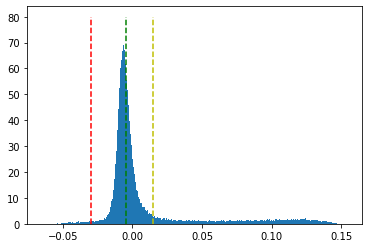

In [52]:
K = 1

all_scores_v = np.concatenate([S[:K] for S in ens_match_d['S']])
m = np.median( all_scores_v )
s = np.std( all_scores_v )

# P_MIN = -0.03 + m
# P_CUT =  0.02 + m

P_MIN = -0.03
P_CUT =  0.015

_ = plt.hist( all_scores_v, bins=300, density=True)
plt.plot([P_CUT, P_CUT], [0, 80], 'y--')
plt.plot([m, m], [0, 80], 'g--')
plt.plot([P_MIN, P_MIN], [0, 80], 'r--')
plt.show()

In [53]:
submission_df_path = f'./submissions/match_submission_V{VERSION}.csv'

sub_df = make_match_submission(
    ens_match_d,
    p_min=P_MIN,
    p_cut=P_CUT,
    k=10,
    k_cut=1,
    submission_df_path=submission_df_path,
)

print(' - Number of rows:', len(sub_df) )

100%|██████████████████████████████████| 50000/50000 [00:02<00:00, 23956.09it/s]


 - Created: ./submissions/match_submission_V8.csv
 - Number of rows: 406773


In [54]:
eval_d = evaluate(
    submission_path=submission_df_path,
    gt_path=public_ground_truth_path,
    is_matching=True,
    verbose=True,
)

 Running evaluation on: "./submissions/match_submission_V8.csv"
{
  "average_precision": 0.7496562776645745,
  "recall_p90": 0.667601683029453
}


### Adding GT samples

In [55]:
f = np.array( [int(q[1:]) >= 25_000 for q in sub_df.query_id.values] )
gt_sub_df = pd.concat(
    [
        public_gt[~pd.isna(public_gt.reference_id)], 
        sub_df.iloc[f]
    ],
    axis=0
)

gt_sub_df.fillna(1.0, inplace=True)
gt_sub_df.reset_index(inplace=True)
gt_sub_df.drop('index', axis=1, inplace=True)

gt_submission_df_path = submission_df_path.replace('.csv', '_GT.csv')

gt_sub_df.to_csv(gt_submission_df_path, index=False)

print(f' - Created: {gt_submission_df_path}')
    
gt_sub_df

 - Created: ./submissions/match_submission_V8_GT.csv


,query_id,reference_id,score
0,Q00003,R326040,1.000000
1,Q00004,R852827,1.000000
2,Q00008,R246671,1.000000
3,Q00026,R937849,1.000000
4,Q00028,R557200,1.000000
...,...,...,...
208144,Q49999,R285480,-0.012711
208145,Q49999,R339008,-0.013382
208146,Q49999,R069612,-0.014005
208147,Q49999,R037200,-0.014970


# Summary

```
all_submission_path_v = [
    './checkpoints/sjy_test5/FacebookModel_Eepoch=51_TLtrn_loss_epoch=0.8669_TAtrn_acc_epoch=0.9914_VLval_loss_epoch=0.4390_VAval_acc_epoch=0.9930_512x512_REF.h5',
    './checkpoints/smp_test19/FacebookModel_Eepoch=67_TLtrn_loss_epoch=0.9913_TAtrn_acc_epoch=0.0000_VLval_loss_epoch=0.4815_VAval_acc_epoch=0.9893_224x224_REF.h5',
    
    './checkpoints/smp_test22/FacebookModel_Eepoch=15_TLtrn_loss_epoch=2.1522_TAtrn_acc_epoch=0.0000_VLval_loss_epoch=nan_VAval_acc_epoch=0.9752_160x160_REF.h5',
    
    './checkpoints/smp_test24/FacebookModel_epoch=79_trn_loss_epoch=0.6660_trn_acc_epoch=0.0000_val_loss_epoch=0.3122_val_acc_epoch=0.9937_160x160_REF.h5',
    
    './checkpoints/smp_test25/FacebookModel_epoch=16_trn_loss_epoch=0.9023_trn_acc_epoch=0.0000_val_loss_epoch=0.4303_val_acc_epoch=0.9911_160x160_REF.h5',
    './checkpoints/smp_test25/FacebookModel_epoch=14_trn_loss_epoch=0.8997_trn_acc_epoch=0.0000_val_loss_epoch=0.4437_val_acc_epoch=0.9912_160x160_REF.h5',
    
    './checkpoints/smp_test26/FacebookModel_epoch=27_trn_loss_epoch=0.7062_trn_acc_epoch=0.0000_val_loss_epoch=0.3296_val_acc_epoch=0.9935_160x160_REF.h5',
    './checkpoints/smp_test26/1.5M/FacebookModel_epoch=17_trn_loss_epoch=0.9250_trn_acc_epoch=0.0000_val_loss_epoch=0.4375_val_acc_epoch=0.9919_LIGHT_160x160_REF.h5',
    
    './checkpoints/sjy_test9/epoch=9-step=42649_LIGHT_160x160_REF.h5',
    
    './checkpoints/sjy_test10/epoch=9-step=42619_LIGHT_160x160_REF.h5',
    './checkpoints/sjy_test10/epoch=37-step=161955_LIGHT_160x160_REF.h5',
]


 Running evaluation on: "./submissions/match_submission_V8.csv"
{
  "average_precision": 0.7496562776645745,
  "recall_p90": 0.667601683029453
}
```